<a href="https://colab.research.google.com/github/Johyeonje/DeepLearningStudy/blob/master/Start!_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
rand = tf.random.uniform([5,2,7],0,1)
print(rand)

tf.Tensor(
[[[0.57667136 0.8302016  0.31808782 0.5977895  0.8865992  0.4212494
   0.6597885 ]
  [0.27787316 0.5321523  0.15692616 0.9381031  0.8616502  0.3457532
   0.9065517 ]]

 [[0.54638684 0.01337123 0.42500603 0.49188364 0.20578778 0.17128456
   0.97990084]
  [0.7698848  0.97178924 0.81158197 0.28330326 0.61053586 0.79979885
   0.48100924]]

 [[0.67194366 0.24397767 0.27139235 0.49604082 0.7736361  0.73921335
   0.9311284 ]
  [0.55659854 0.25014853 0.68079984 0.04226971 0.93358827 0.94981635
   0.77194846]]

 [[0.6452894  0.6589117  0.3828447  0.37553787 0.7423141  0.7938397
   0.6521046 ]
  [0.00900161 0.46521676 0.96551716 0.55483174 0.11751163 0.40153384
   0.7464013 ]]

 [[0.1868838  0.29688072 0.8919275  0.02381349 0.931638   0.6607002
   0.03954256]
  [0.03715754 0.999092   0.28859746 0.17784691 0.966768   0.2741934
   0.36291385]]], shape=(5, 2, 7), dtype=float32)


##정규분포 rand 함수

In [ ]:
rand = tf.random.normal([5],0,0.1)
print(rand)

tf.Tensor([ 0.13061146  0.10081607  0.0860922  -0.01830174  0.00428041], shape=(5,), dtype=float32)


In [ ]:
import math
def sigmoid(x):
  return 1 / (1+math.exp(-x))

In [ ]:
x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.5989836406471405


In [ ]:
for i in range(1000):
  output = sigmoid(x + w)
  error = y - output
  w = w + x * 0.1 * error

  if i %100 == 99:
    print(i, error, output)

99 -0.1264948434748756 0.1264948434748756
199 -0.05848722242056388 0.05848722242056388
299 -0.0375179080237256 0.0375179080237256
399 -0.02751110290473762 0.02751110290473762
499 -0.021684062404618426 0.021684062404618426
599 -0.017879617833581555 0.017879617833581555
699 -0.0152038205502877 0.0152038205502877
799 -0.013220843378306604 0.013220843378306604
899 -0.011693196880384409 0.011693196880384409
999 -0.010480572288990625 0.010480572288990625


In [ ]:
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w)
  error = y - output
  w = w + x * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


##편향의 추가 : b

###의문점 : x가 0이면 아무리 반복해도 w에 영향을 줄 수 없는데?
답 : 목표 자체가 틀렸다. w를 바꾸는게 목표가 아니라 y를 1로 만드는 것이 목표이기 때문에 b값이 바뀌면서 1로 수렴되는 것이 핵심이다.

In [ ]:
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
  output = sigmoid(x*w + 1*b)
  error = y - output
  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99:
    print(i, error, output)

99 0.07886557319555731 0.9211344268044427
199 0.04521710498778542 0.9547828950122146
299 0.03148863187954842 0.9685113681204516
399 0.024098811494580485 0.9759011885054195
499 0.01949704372120009 0.9805029562787999
599 0.016361256564710103 0.9836387434352899
699 0.01408933682255653 0.9859106631774435
799 0.012368584204575206 0.9876314157954248
899 0.011020626196954875 0.9889793738030451
999 0.009936456233811342 0.9900635437661887


In [ ]:
print(int(True))
print(int(False))

1
0


##왜     w = w + x[j] * 0.1 * error 식일까?

In [ ]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.11122744174568996
399 -0.0660273966411591
599 -0.04684133947511528
799 -0.03618834333284495
999 -0.029429293902025
1199 -0.024768460618457874
1399 -0.021366356707370728
1599 -0.01877667971157795
1799 -0.01673890218909754
1999 -0.015096331787054877


In [ ]:
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [ ]:
print([1,2,3]*0.01)

TypeError: ignored

In [ ]:
print([0.1,0.2,0.3]*0.01)

TypeError: ignored

원소에 대한 연산

In [ ]:
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


And 신경망 네트워크

In [ ]:
for i in range(4):
  print('X:',x[i],'Y:',y[i],'Output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9647551545710068
X: [1 0] Y: [0] Output: 0.02497491415594325
X: [0 1] Y: [0] Output: 0.025051560190716825
X: [0 0] Y: [0] Output: 2.4044137212425957e-05


Or 신경망 네트워크

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b*b_x)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 -0.04628697301483051
399 -0.024943789464739227
599 -0.01696359314933585
799 -0.012809243116731747
999 -0.010271578748136535
1199 -0.008564302500295655
1399 -0.0073393535515870745
1599 -0.006417913210041634
1799 -0.005700996774932465
1999 -0.005125767878546683


In [ ]:
for i in range(4):
  print('X:',x[i],'Y:',y[i],'Output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999972444989114
X: [1 0] Y: [1] Output: 0.9898399808327298
X: [0 1] Y: [1] Output: 0.9898104175387653
X: [0 0] Y: [0] Output: 0.025414868585844103


XOR 신경망 네트워크

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b*b_x)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 199:
    print(i, error_sum)

199 0.0015295468959629632
399 6.216566972516713e-05
599 2.5250188937508966e-06
799 1.265766355063036e-07
999 1.8614210173240053e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [ ]:
for i in range(4):
  print('X:',x[i],'Y:',y[i],'Output:',sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [ ]:
print('w:',w)
print('b:',b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


단층 신경망으로는 XOR과 같은 네트워크를 구현하기 어렵기 때문에 다층 신경망을 사용한다.

In [ ]:
import tensorflow as tf
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#About Compile

##최적화 함수(Optimizer)
 : 딥러닝의 학습식을 정의하는 부분    
 keras에서는 미리 정의된 최적화 함수를 불러오는 것으로 바로 사용    
 SGD : 확률적 경사 하강법(Stochasitic Gradient Descent)의 약자로 가중치를 업데이트 할때 미분을 통해 기울기를 구하고 기울기가 낮은 쪽으로 업데이트를 하는 경사 하강법을 한번에 계산하지 않고 확률적으로 일부 샘플을 조금씩 나눠 계산하겠다는 뜻


##손실(Loss)
 : 딥러닝 학습의 방향으로 지정되는 수치로 기대 출력에서 실제 출력을 뺀 값을 기반으로 도출    
 mse : 평균 제곱 오차(Mean Squared Error)의 약자로 기대출력에서 실제 출력을 뺀 뒤 제곱한 값의 평균

In [ ]:
history = model.fit(x, y, epochs=2000, batch_size=1)

In [ ]:
model.predict(x)

array([[0.11759204],
       [0.91151905],
       [0.9111557 ],
       [0.07420084]], dtype=float32)

In [ ]:
for weight in model.weights:
  print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.4482832, -5.4945126],
       [-3.4326172, -5.394544 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([5.002784 , 1.8949552], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 6.544242 ],
       [-7.0653973]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-2.8823576], dtype=float32)>


#시각화 기초

###기초그래프

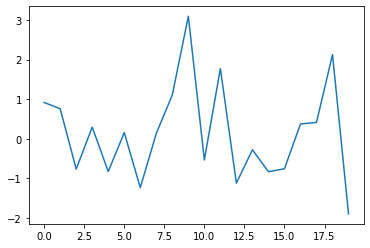

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

###점그래프

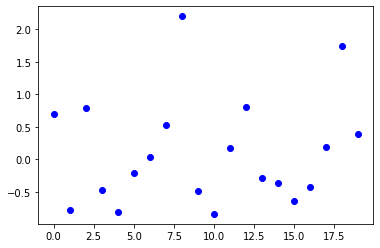

In [ ]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

###히스토그램

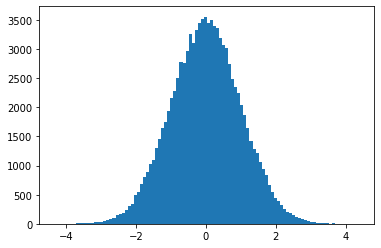

In [ ]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

###선그래프

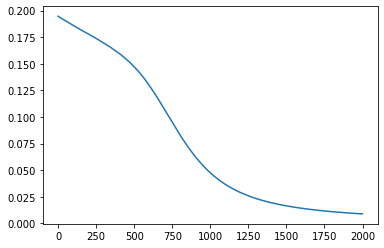

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])